# Get down mt.Fuji/ Calculate gradient of slope

### 1, Illustrate a cross section of mt. Fuji

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # Set prohibition of index display

# 「Number of the point(x)」「latitude」「longitude」「Elevation)」「Distance from point 0」
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

In [2]:
print(fuji[136])

[   136.           35.362555    138.739261   3434.59      43821.      ]


In [3]:
"""

define calculatar of information of the array 

"""

def array_info(x):
    print("Array shape", x.shape)
    print("Data type of array element", x.dtype)
    print("Contents of the array\n",x,"\n")

# Check the information of mt.fuji
print(array_info(fuji))

Array shape (300, 5)
Data type of array element float64
Contents of the array
 [[     0.           35.134141    139.132082      0.            0.      ]
 [     1.           35.135826    139.129202      0.          322.      ]
 [     2.           35.13751     139.126322      0.          644.      ]
 ..., 
 [   297.           35.631284    138.271368   1973.99      95698.      ]
 [   298.           35.632947    138.268452   1841.36      96020.      ]
 [   299.           35.63461     138.265536   1725.8       96343.      ]] 

None


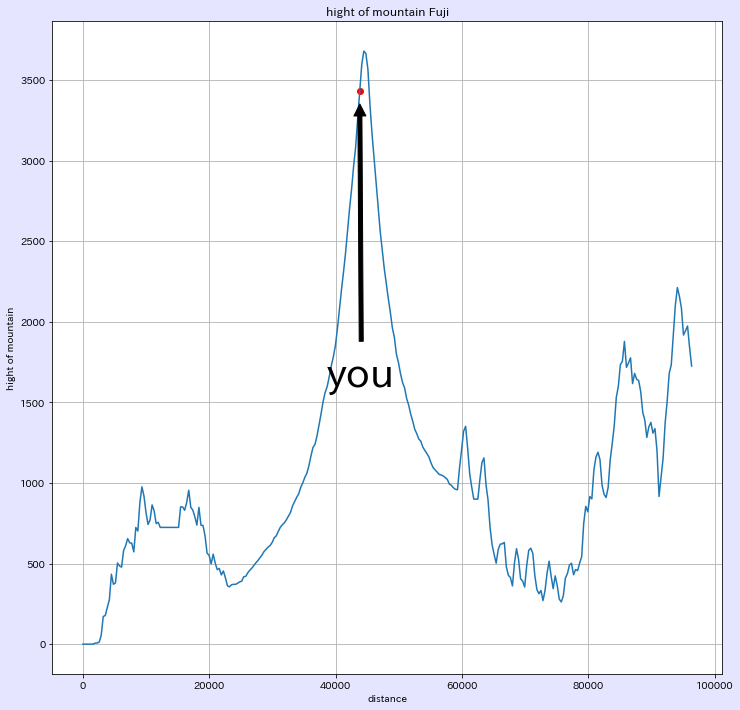

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# define Initial setting 
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

ax.annotate('you', xy=(fuji[136][4], fuji[136][3]), xytext=(fuji[120][4], fuji[120][3]),
            size=40, arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()

# plot a cross section of mt.Fuji
plt.title("hight of mountain Fuji")
plt.xlabel("distance")
plt.ylabel("hight of mountain")

plt.plot(fuji[:, 4], fuji[:, 3])
plt.scatter(fuji[136,4], fuji[136,3], marker='o', color='red')

### 2, Generate a function of calculating gradient

In [5]:

def calculate_grad(x):
    
    
    """

    Generated function to calculate the gradient falling from 136 point to 0 point

    1. Declare a function to obtain a gradient　
    2．Generate an array from 2.136 point to 0 point
    3. Generate an array of gradients for each point

    """
    return (fuji[x, 3] -fuji[x-1, 3]) / (x-(x-1))

sample_glad = calculate_grad(139)
print(sample_glad)

for num_sample in range(5):
    print(fuji[136+num_sample])


# def calculate_grad (x=136):

#  """

#     Generated function to calculate the gradient falling from 136 point to 0 point

#     1. Declare a function to obtain a gradient　
#     2．Generate an array from 2.136 point to 0 point
#     3. Generate an array of gradients for each point

# """
#     grad_mt = np.array([])
#     listx = []
    
#     for num0 in range(136):
#         num0_true = 135 - num0
#         listx.append(num0_true)
        
#         grad_mt = np.array([])

#     for num in listx:
#         if num > 0:
#             grad_mt = np.append(grad_mt, (fuji[num][3]- fuji[num-1][3])
#                                       / (fuji[num][0] - fuji[num-1][0]))
#         else:
#             break

#     return grad_mt
# # Update values
# grad_mt = calculate_grad(x=136)

# print(grad_mt)
# len(grad_mt)

-15.06
[   136.           35.362555    138.739261   3434.59      43821.      ]
[   137.           35.36423     138.736364   3600.08      44143.      ]
[   138.           35.365904    138.733468   3679.96      44466.      ]
[   139.           35.367579    138.730571   3664.9       44788.      ]
[   140.           35.369253    138.727674   3567.76      45110.      ]


### 3, Generate grad & elevation

In [6]:
def down_mt_fuji(now_point=136,number_of_trial=100, alpha=0.17):
    """
    
    define function of Gradient descent method.
    
    now_point: the point where you are.
    number_of_trial: Max times to process.
    alpha: hyper parameter.
    
    """
    
    # initial value substitution 
    move_point = now_point # next point to move
    
    now_grad = calculate_grad(now_point) # slope of mt.Fuji
    para_grad = 0 # alpha*now_grad
    
    # lists for output: only substitute initial value
    down_list_grad = [calculate_grad(now_point)]
    down_list_elevation = [fuji[now_point][3]]
    down_list_move_point = [fuji[now_point][0]]
    
    for _ in range(number_of_trial):
        if now_grad - para_grad > 0:
            para_grad = int(round(alpha*now_grad))
            move_point -= para_grad
            now_grad = calculate_grad(move_point)

            down_list_grad.append(now_grad)
            down_list_elevation.append(fuji[move_point][3])
            down_list_move_point.append(move_point)

            now_point = move_point
            
        else:
            break
    
    return down_list_move_point, down_list_grad, down_list_elevation 
    

[136.0, 107, 100, 97, 93, 90, 88, 85, 82, 79, 74]
[3434.5900000000001, 973.32000000000005, 772.58000000000004, 725.72000000000003, 631.71000000000004, 588.99000000000001, 553.63999999999999, 505.10000000000002, 458.66000000000003, 418.41000000000003, 371.04000000000002]


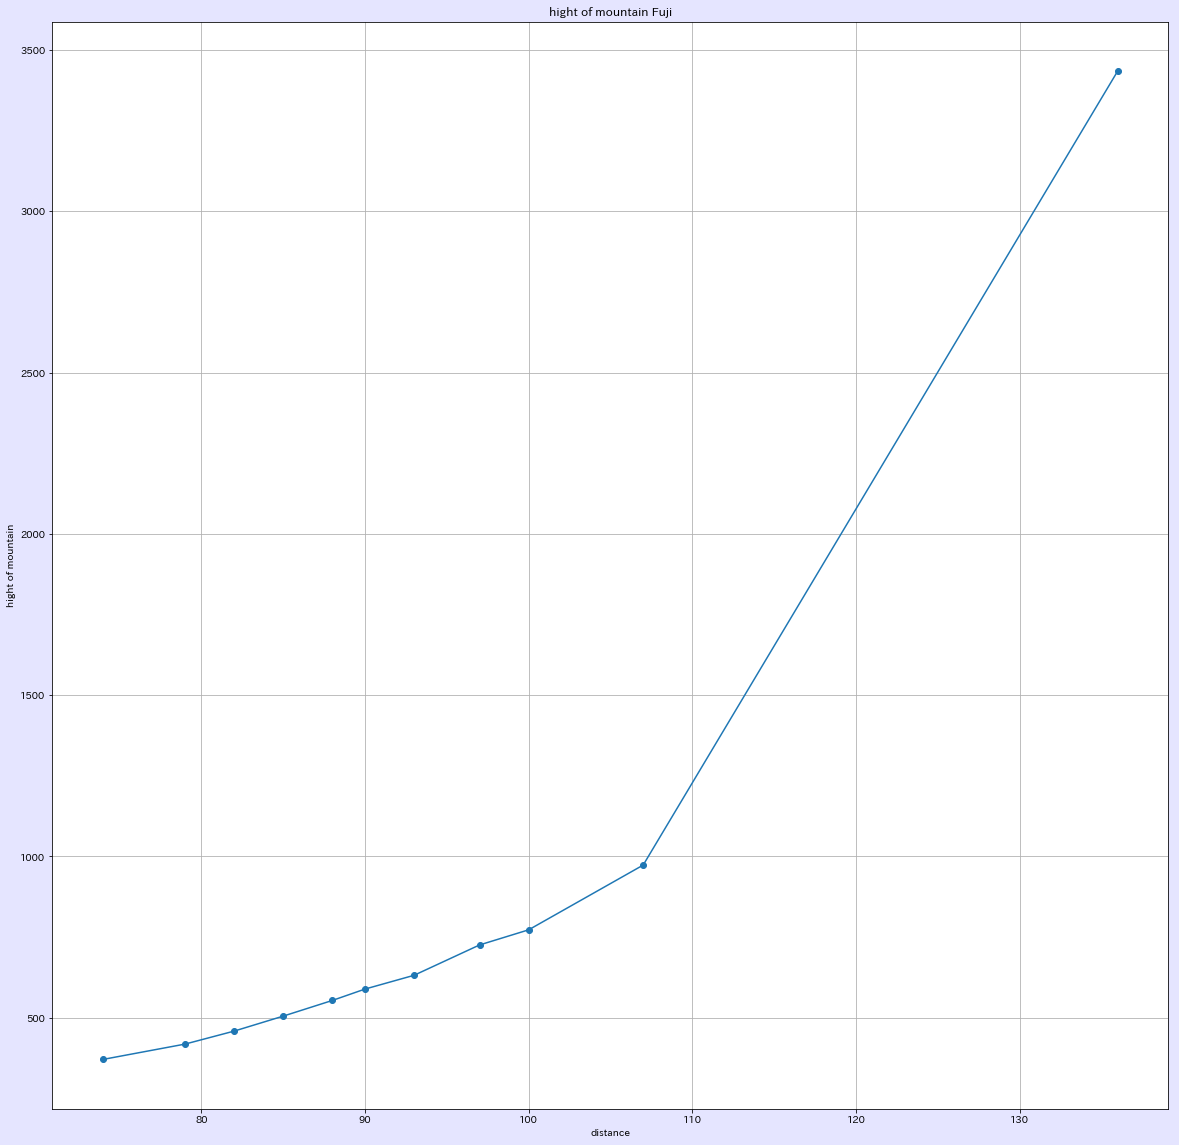

In [7]:
# Specifying argument
down_list_move_point, down_list_grad, down_list_elevation = down_mt_fuji(136, 100, 0.17)

# define Initial setting 
fig, ax = plt.subplots(figsize=(20, 20))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("hight of mountain Fuji")
plt.xlabel("distance")
plt.ylabel("hight of mountain")

plt.plot(down_list_move_point, down_list_elevation, marker='o')

# Check elements of the lists
print(down_list_move_point)
print(down_list_elevation)

### 4, Changing the initial value

In [8]:
def down_mt_fuji_2(now_point_2=136,number_of_trial_2=100, alpha_2=0.17):
    """
    down_mt_fuji_2();
    define function of Gradient descent method.
    
    The difference from the former function is 
    that it decides own direction to get down.
    
    now_point: the point where you are.
    number_of_trial: Max times to process.
    alpha: hyper parameter.
    
    """
    
    # initial value substitution 
    move_point_2 = now_point_2 # next point to move
    
    now_grad_2 = calculate_grad(now_point_2) # slope of mt.Fuji
    para_grad_2 = 0 # alpha*now_grad
    
    # lists for output: only substitute initial value
    down_list_grad_2 = [calculate_grad(now_point_2)]
    down_list_elevation_2 = [fuji[now_point_2][3]]
    down_list_move_point_2 = [fuji[now_point_2][0]]
    
    # decide which way you go to walk
    if now_grad_2 >= 0:
        # avoid infinite loop
        for _ in range(number_of_trial_2):
            # compare gradient
            if now_grad_2 - para_grad_2 >= 0:
                para_grad_2 = int(round(alpha_2*now_grad_2))
                move_point_2 -= para_grad_2
                now_grad_2 = calculate_grad(move_point_2)

                down_list_grad_2.append(now_grad_2)
                down_list_elevation_2.append(fuji[move_point_2][3])
                down_list_move_point_2.append(move_point_2)
                
                # Stop the trial when there is no defference between now and move
                if (now_point_2 - move_point_2) != 0:
                    now_point_2 = move_point_2
                    
                else:
                    break
            
    else:
        # avoid infinite loop
        for _ in range(number_of_trial_2):
            # compare gradient
            if now_grad_2 - para_grad_2 <= 0:
                para_grad_2 = int(round(alpha_2*now_grad_2))
                move_point_2 -= para_grad_2
                now_grad_2 = calculate_grad(move_point_2)

                down_list_grad_2.append(now_grad_2)
                down_list_elevation_2.append(fuji[move_point_2][3])
                down_list_move_point_2.append(move_point_2)
                
                # Stop the trial when there is no defference between now and move
                if (now_point_2 - move_point_2) != 0:
                    now_point_2 = move_point_2
                
                else:
                    break

    return down_list_move_point_2, down_list_grad_2, down_list_elevation_2 
    

[140.0, 150, 159, 166, 167, 171, 175, 176, 176]
[3567.7600000000002, 2146.0100000000002, 1525.5699999999999, 1259.24, 1222.48, 1124.8299999999999, 1053.28, 1049.3299999999999, 1049.3299999999999]
[-97.139999999999873, -94.9699999999998, -65.400000000000091, -13.740000000000009, -36.759999999999991, -36.019999999999982, -14.769999999999982, -3.9500000000000455, -3.9500000000000455]


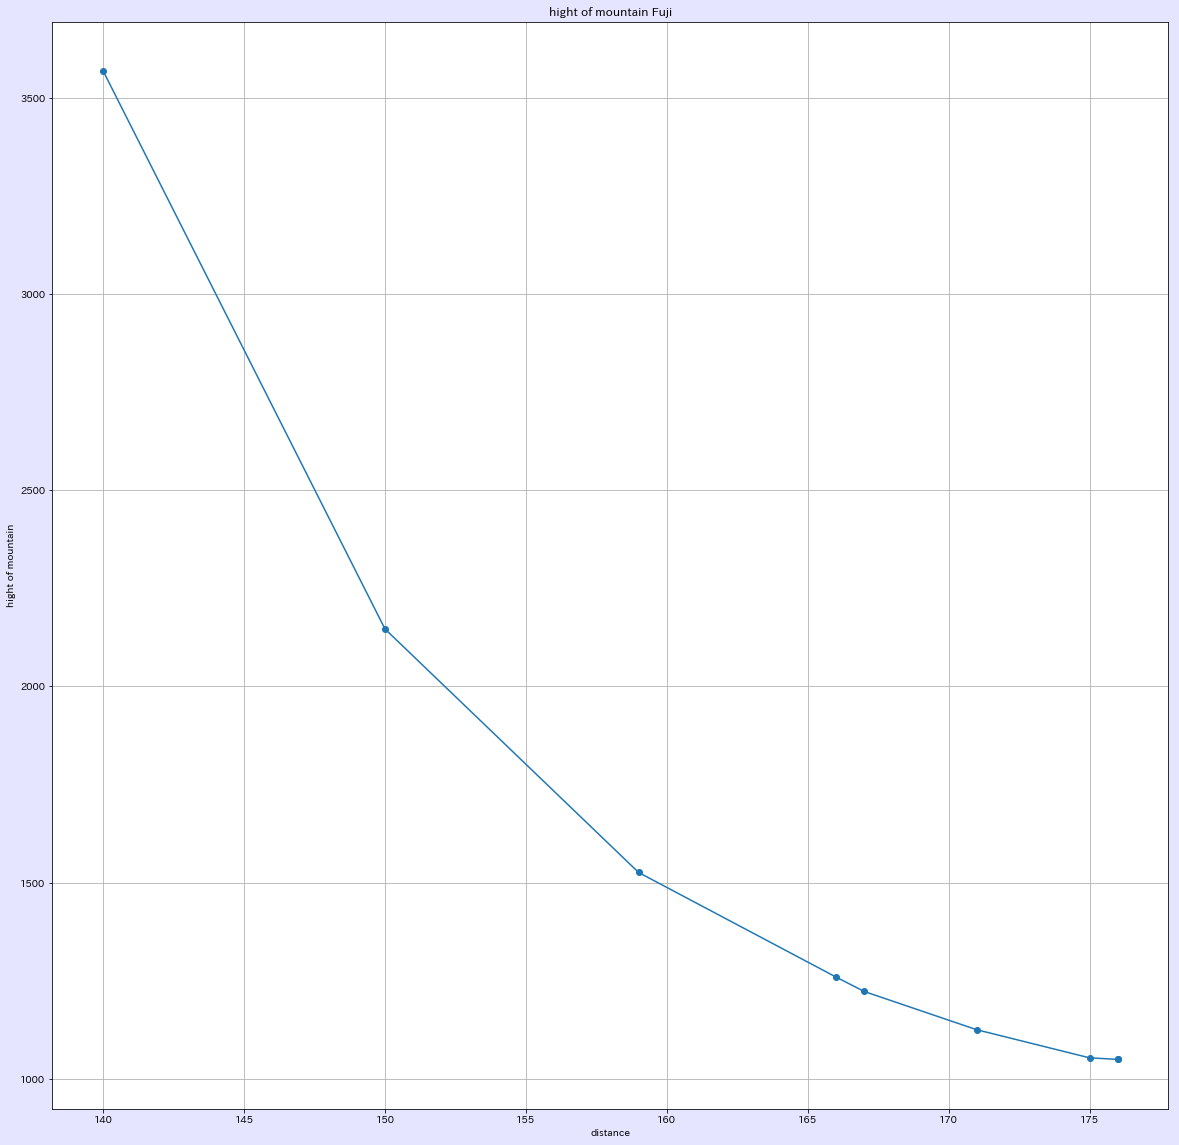

In [9]:
# Specifying argument
down_list_move_point_2, down_list_grad_2, down_list_elevation_2 = down_mt_fuji_2(140, 100, 0.1)

# define Initial setting 
fig, ax = plt.subplots(figsize=(20, 20))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("hight of mountain Fuji")
plt.xlabel("distance")
plt.ylabel("hight of mountain")

plt.plot(down_list_move_point_2, down_list_elevation_2, marker='o')

# Check elements of the lists
print(down_list_move_point_2)
print(down_list_elevation_2)
print(down_list_grad_2)

### 5, Advance session / Parallel calculation

In [11]:
def down_mt_fuji_2(now_point_2=136,number_of_trial_2=100, alpha_2=0.17):
    """
    down_mt_fuji_2();
    define function of Gradient descent method.
    
    The difference from the former function is 
    that it decides own direction to get down.
    
    now_point: the point where you are.
    number_of_trial: Max times to process.
    alpha: hyper parameter.
    
    """
    
    # initial value substitution 
    move_point_2 = now_point_2 # next point to move
    
    now_grad_2 = calculate_grad(now_point_2) # slope of mt.Fuji
    para_grad_2 = 0 # alpha*now_grad
    
    # lists for output: only substitute initial value
    down_list_grad_2 = [calculate_grad(now_point_2)]
    down_list_elevation_2 = [fuji[now_point_2][3]]
    down_list_move_point_2 = [fuji[now_point_2][0]]
    
    # decide which way you go to walk
    if now_grad_2 >= 0:
        # avoid infinite loop
        for _ in range(number_of_trial_2):
            # compare gradient
            if now_grad_2 - para_grad_2 >= 0:
                para_grad_2 = int(round(alpha_2*now_grad_2))
                move_point_2 -= para_grad_2
                now_grad_2 = calculate_grad(move_point_2)

                down_list_grad_2.append(now_grad_2)
                down_list_elevation_2.append(fuji[move_point_2][3])
                down_list_move_point_2.append(move_point_2)
                
                # Stop the trial when there is no defference between now and move
                if (now_point_2 - move_point_2) != 0:
                    now_point_2 = move_point_2
                    
                else:
                    break
            
    else:
        # avoid infinite loop
        for _ in range(number_of_trial_2):
            # compare gradient
            if now_grad_2 - para_grad_2 <= 0:
                para_grad_2 = int(round(alpha_2*now_grad_2))
                move_point_2 -= para_grad_2
                now_grad_2 = calculate_grad(move_point_2)

                down_list_grad_2.append(now_grad_2)
                down_list_elevation_2.append(fuji[move_point_2][3])
                down_list_move_point_2.append(move_point_2)
                
                # Stop the trial when there is no defference between now and move
                if (now_point_2 - move_point_2) != 0:
                    now_point_2 = move_point_2
                
                else:
                    break

    return down_list_move_point_2, down_list_grad_2, down_list_elevation_2

ones_array = np.ones(300) # all elements are one.
permutation_array = np.arange(300) # 0~299
product_of_one_permutation = ones_array*permutation_array # 0~299

# Broadcast
three_hundred_permutation = product_of_one_permutation + 1 # 1~300 

# Specifying argument
down_list_move_point_, down_list_grad_2, down_list_elevation_2 = down_mt_fuji_2(139, 100, 0.1)


### 6, Advance session / Hyper parameter validation

In [12]:
alpha_list = three_hundred_permutation*0.002/3
print(alpha_list)

[ 0.00066667  0.00133333  0.002       0.00266667  0.00333333  0.004
  0.00466667  0.00533333  0.006       0.00666667  0.00733333  0.008
  0.00866667  0.00933333  0.01        0.01066667  0.01133333  0.012
  0.01266667  0.01333333  0.014       0.01466667  0.01533333  0.016
  0.01666667  0.01733333  0.018       0.01866667  0.01933333  0.02
  0.02066667  0.02133333  0.022       0.02266667  0.02333333  0.024
  0.02466667  0.02533333  0.026       0.02666667  0.02733333  0.028
  0.02866667  0.02933333  0.03        0.03066667  0.03133333  0.032
  0.03266667  0.03333333  0.034       0.03466667  0.03533333  0.036
  0.03666667  0.03733333  0.038       0.03866667  0.03933333  0.04
  0.04066667  0.04133333  0.042       0.04266667  0.04333333  0.044
  0.04466667  0.04533333  0.046       0.04666667  0.04733333  0.048
  0.04866667  0.04933333  0.05        0.05066667  0.05133333  0.052
  0.05266667  0.05333333  0.054       0.05466667  0.05533333  0.056
  0.05666667  0.05733333  0.058       0.05866667  

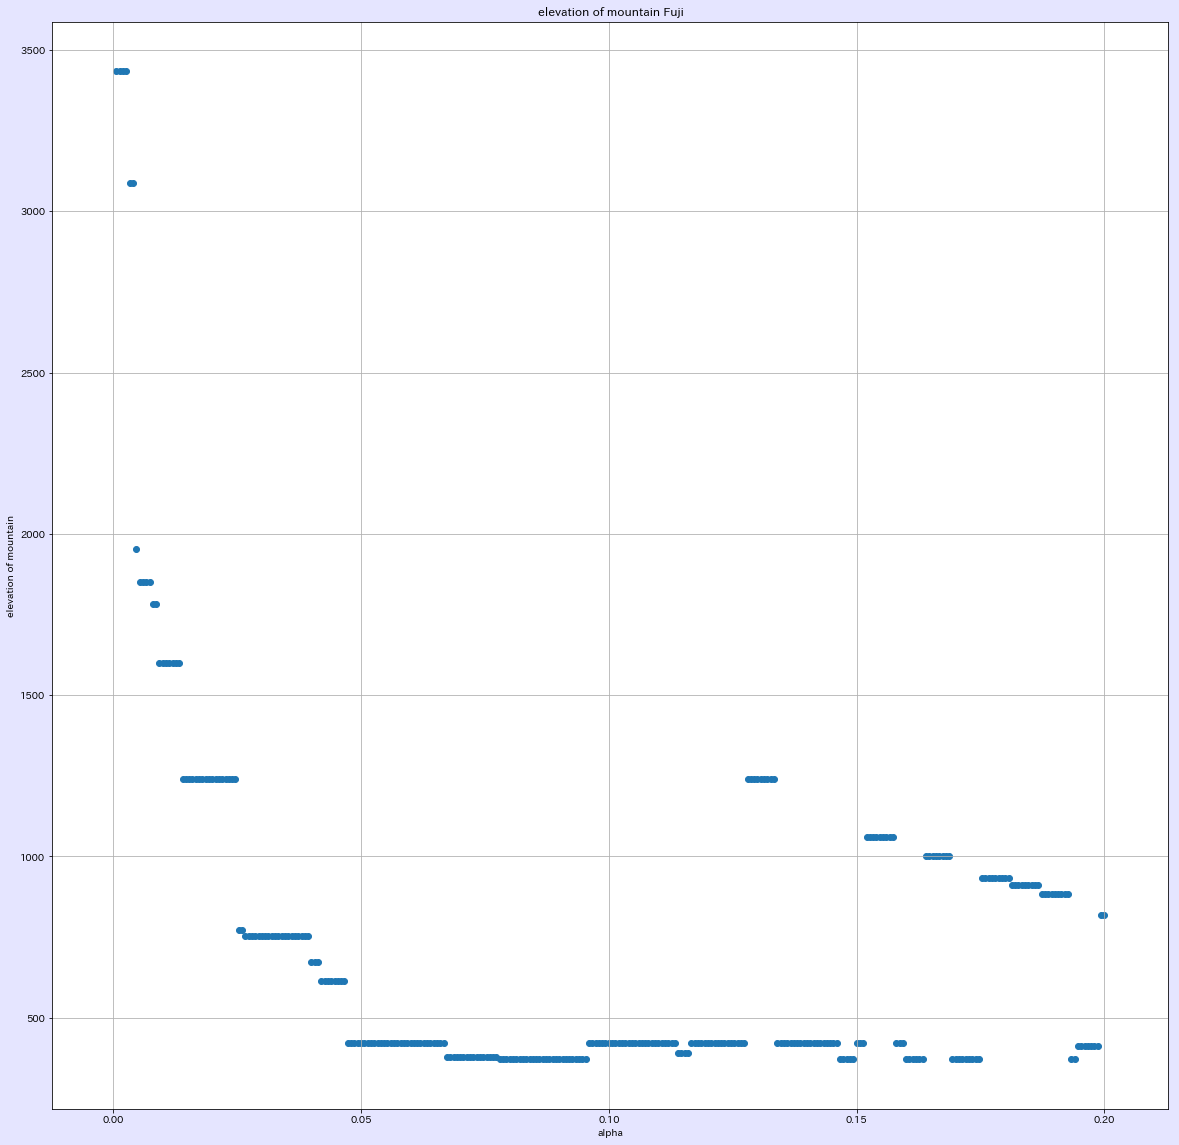

In [18]:
# generate empty list for elevation of mt.Fuji
last_elevation_list = []
for alpha in alpha_list:
    pararel_move_point, pararel_grad, pararel_elevation = down_mt_fuji_2(136, 100, alpha)
    last_elevation_list.append(pararel_elevation[-1])

    
# define Initial setting 
fig, ax = plt.subplots(figsize=(20, 20))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("elevation of mountain Fuji")
plt.xlabel("alpha")
plt.ylabel("elevation of mountain")

plt.scatter(alpha_list, last_elevation_list, marker='o')

### 7, Advance session / Local minimum

### [What is local minimum?]
Local minimum is incorrect minimum like true minimum. It is because the purpose of stochastic gradient descent(SGD) is finding the point whrere the gradient equals to 0. 1) If there are multiple points, SGD decide more closer point as minimum. 2) There is also problem wwhen the point is at saddle point. Saddle point is minimum looked from a certain dimension, but is also maximum from another dimension.

### [Counterplan]
1) A first counterplan is to increase the hyper parameter and decrease the value at an appropriate timing. 2) A second plan is to watch carefully which direction is the best to move and whether the hyper parameter increse or decrease.
